ASSIGNMENT DONE IN COLLABORATION WITH:

EKATERINA GERASKINA  
Student number: 2636212

# Advanced Machine Learning - Assignment 3
Welcome to your third programming assignment. You have previously trained a 2-layer Neural Network (with a single hidden layer). In this assignment, you will build a deep neural network, with as many layers as you want! You will use use the functions you have implemented in the previous assignment to build a deep network, and apply it to cat versus non-cat classification. Hopefully, you will see an improvement in accuracy relative to your previous logistic regression implementation.  

**After this assignment you will be able to:**
- Use non-linear units like ReLU to improve your model
- Build a deeper neural network (with more than 1 hidden layer)
- Implement an easy-to-use neural network class

**Notation**:
- Superscript $[l]$ denotes a quantity associated with the $l^{th}$ layer. 
    - Example: $a^{[L]}$ is the $L^{th}$ layer activation. $W^{[L]}$ and $b^{[L]}$ are the $L^{th}$ layer parameters.
- Superscript $(i)$ denotes a quantity associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example.
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the $l^{th}$ layer's activations).

Let's get started!

## 1 - Packages ##

First import all the packages that you will need during this assignment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from testCases import *
from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

## 2 - Outline of the Assignment

To build your neural network, you will be implementing several "helper functions". These helper functions will be used to build a two-layer neural network and an L-layer neural network. Each small helper function you will implement will have detailed instructions that will walk you through the necessary steps. Here is an outline of this assignment, you will:

- Initialize the parameters for a two-layer network and for an $L$-layer neural network
- Implement the forward propagation module
     - Complete the LINEAR part of a layer's forward propagation step (resulting in $Z^{[l]}$)
     - We give you the ACTIVATION function (relu/sigmoid)
     - Combine the previous two steps into a new [LINEAR->ACTIVATION] forward function
     - Stack the [LINEAR->RELU] forward function L-1 times (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer $L$). This gives you a new L_model_forward function
- Compute the loss
- Implement the backward propagation module
    - Complete the LINEAR part of a layer's backward propagation step
    - We give you the gradient of the ACTIVATE function (relu_backward/sigmoid_backward) 
    - Combine the previous two steps into a new [LINEAR->ACTIVATION] backward function
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward in a new L_model_backward function
- Finally update the parameters

**Note** that for every forward function, there is a corresponding backward function. That is why at every step of your forward module you will be storing some values in a cache. The cached values are useful for computing gradients. In the backpropagation module you will then use the cache to calculate the gradients. This assignment will show you exactly how to carry out each of these steps. 

## 3 - Initialization

You will write two helper functions that will initialize the parameters for your model. The first function will be used to initialize parameters for a two layer model. The second one will generalize this initialization process to $L$ layers.

### 3.1 - 2-layer Neural Network

**Exercise**: Create and initialize the parameters of the 2-layer neural network.

**Instructions**:
- The model's structure is: *LINEAR -> RELU -> LINEAR -> SIGMOID*
- Use random initialization for the weight matrices. Use `np.random.randn(shape)*0.01` with the correct shape
- Use zero initialization for the biases. Use `np.zeros(shape)`

In [2]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    # YOUR CODE HERE
    W1 = np.random.randn(n_h,n_x) * 0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))
    # YOUR CODE ENDS HERE
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters    

In [3]:
parameters = initialize_parameters(3,2,1)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[ 0.01624345 -0.00611756 -0.00528172]
 [-0.01072969  0.00865408 -0.02301539]]
b1 = [[0.]
 [0.]]
W2 = [[ 0.01744812 -0.00761207]]
b2 = [[0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td>W1</td>
    <td>[[ 0.01624345 -0.00611756 -0.00528172] [-0.01072969  0.00865408 -0.02301539]]</td> 
  </tr>
  <tr>
    <td>b1</td>
    <td>[[ 0.] [ 0.]]</td> 
  </tr>
  <tr>
    <td>W2</td>
    <td>[[ 0.01744812 -0.00761207]]</td>
  </tr>
  <tr>
    <td>b2</td>
    <td>[[ 0.]]</td> 
  </tr>
</table>

### 3.2 - L-layer Neural Network

The initialization for a deeper L-layer neural network is more complicated because there are many more weight matrices and bias vectors. When completing the `initialize_parameters_deep`, you should make sure that your dimensions match between each layer. Recall that $n^{[l]}$ is the number of units in layer $l$. Thus, for example, if the size of our input $X$ is $(12288, 209)$ (with $m=209$ examples) then:

<table style="width:100%">
    <tr>
        <td>  </td> 
        <td> Shape of W </td> 
        <td> Shape of b  </td> 
        <td> Activation </td>
        <td> Shape of Activation </td> 
    <tr> 
    <tr>
        <td> Layer 1 </td> 
        <td> $(n^{[1]},12288)$ </td> 
        <td> $(n^{[1]},1)$ </td> 
        <td> $Z^{[1]} = W^{[1]}  X + b^{[1]} $ </td>       
        <td> $(n^{[1]},209)$ </td> 
    <tr>    
    <tr>
        <td> Layer 2 </td> 
        <td> $(n^{[2]}, n^{[1]})$  </td> 
        <td> $(n^{[2]},1)$ </td> 
        <td>$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$ </td> 
        <td> $(n^{[2]}, 209)$ </td> 
    <tr>   
       <tr>
        <td> $\vdots$ </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$  </td> 
        <td> $\vdots$</td> 
        <td> $\vdots$  </td> 
    <tr>
    <tr>
        <td> Layer L-1 </td> 
        <td> $(n^{[L-1]}, n^{[L-2]})$ </td> 
        <td> $(n^{[L-1]}, 1)$  </td> 
        <td>$Z^{[L-1]} =  W^{[L-1]} A^{[L-2]} + b^{[L-1]}$ </td> 
        <td> $(n^{[L-1]}, 209)$ </td> 
    <tr>  
    <tr>
        <td> Layer L </td> 
        <td> $(n^{[L]}, n^{[L-1]})$ </td> 
        <td> $(n^{[L]}, 1)$ </td>
        <td> $Z^{[L]} =  W^{[L]} A^{[L-1]} + b^{[L]}$</td>
        <td> $(n^{[L]}, 209)$  </td> 
    <tr>
</table>

Remember that when we compute $W X + b$ in Python, it carries out broadcasting. For example, if: 

$$ W = \begin{bmatrix}
    j  & k  & l\\
    m  & n & o \\
    p  & q & r 
\end{bmatrix}\;\;\; X = \begin{bmatrix}
    a  & b  & c\\
    d  & e & f \\
    g  & h & i 
\end{bmatrix} \;\;\; b =\begin{bmatrix}
    s  \\
    t  \\
    u
\end{bmatrix}\tag{2}$$

Then $WX + b$ will be:

$$ WX + b = \begin{bmatrix}
    (ja + kd + lg) + s  & (jb + ke + lh) + s  & (jc + kf + li)+ s\\
    (ma + nd + og) + t & (mb + ne + oh) + t & (mc + nf + oi) + t\\
    (pa + qd + rg) + u & (pb + qe + rh) + u & (pc + qf + ri)+ u
\end{bmatrix}\tag{3}  $$

**Exercise**: Implement initialization for an L-layer Neural Network. 

**Instructions**:
- The model's structure is *[LINEAR -> RELU] $ \times$ (L-1) -> LINEAR -> SIGMOID*. I.e., it has $L-1$ layers using a ReLU activation function followed by an output layer with a sigmoid activation function
- Use random initialization for the weight matrices. Use `np.random.randn(shape) * 0.01`
- Use zeros initialization for the biases. Use `np.zeros(shape)`
- We will store $n^{[l]}$, the number of units in different layers, in a variable `layer_dims`. For example, the `layer_dims` for the planar data classification model from last week would have been [2,4,1]: There were two inputs, one hidden layer with 4 hidden units, and an output layer with 1 output unit. Thus means `W1`'s shape was (4,2), `b1` was (4,1), `W2` was (1,4) and `b2` was (1,1). Now you will generalize this to $L$ layers! 
- Here is the implementation for $L=1$ (one layer neural network). It should inspire you to implement the general case (L-layer neural network).
```python
    if L == 1:
        parameters["W" + str(L)] = np.random.randn(layer_dims[1], layer_dims[0]) * 0.01
        parameters["b" + str(L)] = np.zeros((layer_dims[1], 1))
```

In [6]:
# GRADED FUNCTION: initialize_parameters_deep

def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        # YOUR CODE HERE
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))                     
        # YOUR CODE ENDS HERE
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [7]:
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[0.]
 [0.]
 [0.]]


**Expected output**:
       
<table style="width:80%">
  <tr>
    <td>W1</td>
    <td>[[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
         [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
         [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
         [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]</td> 
  </tr>
  <tr>
    <td>b1</td>
    <td>[[ 0.] [ 0.] [ 0.] [ 0.]]</td> 
  </tr>
  <tr>
    <td>W2</td>
    <td>[[-0.01185047 -0.0020565   0.01486148  0.00236716]
         [-0.01023785 -0.00712993  0.00625245 -0.00160513]
         [-0.00768836 -0.00230031  0.00745056  0.01976111]]</td> 
  </tr>
  <tr>
    <td>b2</td>
    <td>[[ 0.] [ 0.] [ 0.]]</td> 
  </tr>
</table>

## 4 - Forward propagation module

### 4.1 - Linear Forward 
Now that you have initialized your parameters, you will do the forward propagation module. You will start by implementing some basic functions that you will use later when implementing the model. You will complete three functions in this order:

- LINEAR
- LINEAR -> ACTIVATION where ACTIVATION will be either ReLU or Sigmoid
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID (whole model)

The linear forward module (vectorized over all the examples) computes the following equations:

$$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}\tag{4}$$

where $A^{[0]} = X$. 

**Exercise**: Build the linear part of forward propagation.

**Reminder**:
The mathematical representation of this unit is $Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$. You may also find `np.dot()` useful. If your dimensions do not match, printing `W.shape` may help.

In [8]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    # YOUR CODE HERE
    Z = (np.dot(W,A)+b)
    # YOUR CODE ENDS HERE
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [9]:
A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))


Z = [[ 3.26295337 -1.23429987]]


**Expected output**:

<table style="width:35%">
  <tr>
    <td>Z</td>
    <td>[[ 3.26295337 -1.23429987]]</td> 
  </tr>
</table>

### 4.2 - Linear-Activation Forward

In this notebook, you will use two activation functions:

- **Sigmoid**: $\sigma(Z) = \sigma(W A + b) = \frac{1}{ 1 + e^{-(W A + b)}}$. We have provided you with the `sigmoid` function. This function returns **two** items: the activation value "`a`" and a "`cache`" that contains "`Z`" (we will feed this in to the corresponding backward function). To use it you could just call: 
``` python
A, activation_cache = sigmoid(Z)
```

- **ReLU**: The mathematical formula for ReLu is $A = RELU(Z) = max(0, Z)$. We have provided you with the `relu` function. This function returns **two** items: the activation value "`A`" and a "`cache`" that contains "`Z`" (we will feed this in to the corresponding backward function). To use it you could just call:
``` python
A, activation_cache = relu(Z)
```

For more convenience, you are going to group two functions (Linear and Activation) into one function (LINEAR->ACTIVATION). Hence, you will implement a function that does the LINEAR forward step followed by an ACTIVATION forward step.

**Exercise**: Implement the forward propagation of the *LINEAR->ACTIVATION* layer. The mathematical relation is: $A^{[l]} = g(Z^{[l]}) = g(W^{[l]}A^{[l-1]} +b^{[l]})$ where the activation "g" can be sigmoid() or relu(). Use linear_forward() and the correct activation function.

In [20]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        # YOUR CODE HERE
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = sigmoid(Z)
        # YOUR CODE ENDS HERE
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        # YOUR CODE HERE
        Z, linear_cache = linear_forward(A_prev,W,b)
        A, activation_cache = relu(Z)
        # YOUR CODE ENDS HERE
  
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [21]:
A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))


With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896131 0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td>With sigmoid: A</td>
    <td>[[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td>With ReLU: A</td>
    <td>[[ 3.43896131  0.        ]]</td> 
  </tr>
</table>

**Note**: In deep learning, the "[LINEAR->ACTIVATION]" computation is counted as a single layer in the neural network, not two layers. 

### 4.3 - L-Layer Model 

For even more convenience when implementing the $L$-layer Neural Net, you will need a function that replicates the previous one (`linear_activation_forward` with RELU) $L-1$ times, then follows that with one `linear_activation_forward` with SIGMOID.

**Exercise**: Implement the forward propagation of the above model.

**Instruction**: In the code below, the variable `AL` will denote $A^{[L]} = \sigma(Z^{[L]}) = \sigma(W^{[L]} A^{[L-1]} + b^{[L]})$. (This is sometimes also called `Yhat`, i.e., this is $\hat{Y}$.) 

**Tips**:
- Use the functions you had previously written 
- Use a for-loop to replicate [LINEAR->RELU] (L-1) times
- Do not forget to keep track of the caches in the "caches" list. To add a new value `c` to a `list`, you can use `list.append(c)`.

In [28]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """
    
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        # YOUR CODE HERE
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], 'relu')
        caches.append(cache)
        # YOUR CODE ENDS HERE
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    # YOUR CODE HERE
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], 'sigmoid')
    caches.append(cache)
    # YOUR CODE ENDS HERE
   
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [29]:
X, parameters = L_model_forward_test_case_2hidden()
AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))


AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td>AL</td>
    <td> [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td>Length of caches list</td>
    <td>3</td> 
  </tr>
</table>

Great! Now you have a full forward propagation that takes the input X and outputs a row vector $A^{[L]}$ containing your predictions. It also records all intermediate values in "caches". Using $A^{[L]}$, you can compute the cost of your predictions.

## 5 - Cost function

Now you will implement forward and backward propagation. You need to compute the cost, because you want to check if your model is actually learning.

**Exercise**: Compute the cross-entropy cost $J$, using the following formula: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$



In [31]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    # YOUR CODE HERE
    logprobs = np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL), (1-Y))
    cost = - 1/m * np.sum(logprobs)
    # YOUR CODE ENDS HERE
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [32]:
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))


cost = 0.41493159961539694


**Expected Output**:

<table>
    <tr>
    <td>cost</td>
    <td>0.41493159961539694</td> 
    </tr>
</table>

## 6 - Backward propagation module

Just like with forward propagation, you will implement helper functions for backpropagation. Remember that back propagation is used to calculate the gradient of the loss function with respect to the parameters. 

**Reminder**: 

Now, similar to forward propagation, you are going to build the backward propagation in three steps:
- LINEAR backward
- LINEAR -> ACTIVATION backward where ACTIVATION computes the derivative of either the ReLU or sigmoid activation
- [LINEAR -> RELU] $\times$ (L-1) -> LINEAR -> SIGMOID backward (whole model)

### 6.1 - Linear backward

For layer $l$, the linear part is: $Z^{[l]} = W^{[l]} A^{[l-1]} + b^{[l]}$ (followed by an activation).

Suppose you have already calculated the derivative $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$. You want to get $(dW^{[l]}, db^{[l]} dA^{[l-1]})$.

The three outputs $(dW^{[l]}, db^{[l]}, dA^{[l]})$ are computed using the input $dZ^{[l]}$. Here are the formulas you need:
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$

**Exercise**: Use the 3 formulas above to implement linear_backward().

In [33]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    # YOUR CODE HERE
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m*(np.sum(dZ, axis = 1, keepdims = True)) 
    dA_prev = np.dot(W.T, dZ)
    # YOUR CODE ENDS HERE

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [34]:
# Set up some test inputs
dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))


dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[0.50629448]]


**Expected Output**: 

<table style="width:90%">
  <tr>
    <td>dA_prev</td>
    <td>[[ 0.51822968 -0.19517421] [-0.40506361  0.15255393] [ 2.37496825 -0.89445391]]</td> 
  </tr>
  <tr>
    <td>dW</td>
    <td>[[-0.10076895  1.40685096  1.64992505]]</td> 
  </tr> 
  <tr>
    <td>db</td>
    <td>[[ 0.50629448]]</td> 
    </tr> 
</table>

### 6.2 - Linear-Activation backward

Next, you will create a function that merges the two helper functions: **`linear_backward`** and the backward step for the activation **`linear_activation_backward`**. 

To help you implement `linear_activation_backward`, we provided two backward functions:
- **`sigmoid_backward`**: Implements the backward propagation for SIGMOID unit. You can call it as follows:

```python
dZ = sigmoid_backward(dA, activation_cache)
```

- **`relu_backward`**: Implements the backward propagation for RELU unit. You can call it as follows:

```python
dZ = relu_backward(dA, activation_cache)
```

If $g(.)$ is the activation function, 
`sigmoid_backward` and `relu_backward` compute $$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]}) \tag{11}$$.  

**Exercise**: Implement the backpropagation for the *LINEAR->ACTIVATION* layer.

In [45]:
# GRADED FUNCTION: linear_activation_backward

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        # YOUR CODE HERE
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        # YOUR CODE ENDS HERE

    elif activation == "sigmoid":
        # YOUR CODE HERE
        
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
        # YOUR CODE ENDS HERE

    return dA_prev, dW, db

In [46]:
AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))


sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Expected output with sigmoid:**

<table style="width:100%">
  <tr>
    <td>dA_prev</td> 
    <td>[[ 0.11017994  0.01105339] [ 0.09466817  0.00949723] [-0.05743092 -0.00576154]]</td> 
  </tr> 
  <tr>
    <td>dW</td> 
    <td>[[ 0.10266786  0.09778551 -0.01968084]]</td> 
  </tr> 
  <tr>
    <td>db</td> 
    <td>[[-0.05729622]]</td> 
  </tr> 
</table>

**Expected output with relu:**

<table style="width:100%">
  <tr>
    <td>dA_prev</td> 
    <td>[[ 0.44090989  0.        ] [ 0.37883606  0.        ] [-0.2298228   0.        ]]</td>
  </tr> 
  <tr>
    <td>dW</td> 
    <td>[[ 0.44513824  0.37371418 -0.10478989]]</td> 
  </tr> 
  <tr>
    <td>db</td> 
    <td>[[-0.20837892]]</td> 
  </tr> 
</table>

### 6.3 - L-Model Backward 

Now you will implement the backward function for the whole network. Recall that when you implemented the `L_model_forward` function, at each iteration, you stored a cache which contains (X,W,b, and z). In the back propagation module, you will use those variables to compute the gradients. Therefore, in the `L_model_backward` function, you will iterate through all the hidden layers backward, starting from layer $L$. On each step, you will use the cached values for layer $l$ to backpropagate through layer $l$.

** Initializing backpropagation**:
To backpropagate through this network, we know that the output is, 
$A^{[L]} = \sigma(Z^{[L]})$. Your code thus needs to compute `dAL` $= \frac{\partial \mathcal{L}}{\partial A^{[L]}}$.
To do so, use this formula:
```python
dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL)) # derivative of cost with respect to AL
```

You can then use this post-activation gradient `dAL` to keep going backward. You can now feed in `dAL` into the LINEAR->SIGMOID backward function you implemented (which will use the cached values stored by the L_model_forward function). After that, you will have to use a `for` loop to iterate through all the other layers using the LINEAR->RELU backward function. You should store each dA, dW, and db in the grads dictionary. To do so, use this formula : 

$$grads["dW" + str(l)] = dW^{[l]}\tag{15} $$

For example, for $l=3$ this would store $dW^{[l]}$ in `grads["dW3"]`.

**Exercise**: Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.

In [107]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    # YOUR CODE HERE
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    # YOUR CODE ENDS HERE

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    # YOUR CODE HERE
    grads["dA" + str(L)] = dAL
    dA_prev, grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, caches[L-1], activation = "sigmoid")
        
    # YOUR CODE ENDS HERE
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        # YOUR CODE HERE
        grads["dA" + str(l + 1)] =dA_prev
        dA_prev, grads["dW" + str(l + 1)], grads["db" + str(l + 1)]= linear_activation_backward(dA_prev, caches[l], activation = "relu")
        # YOUR CODE ENDS HERE

    return grads

In [108]:
AL, Y_assess, caches = L_model_backward_test_case()
grads = L_model_backward(AL, Y_assess, caches)
print_grads(grads)


dW1 = [[0.41010002 0.07807203 0.13798444 0.10502167]
 [0.         0.         0.         0.        ]
 [0.05283652 0.01005865 0.01777766 0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


**Expected Output**

<table style="width:60%">
  
  <tr>
    <td>dW1 </td> 
    <td>[[ 0.41010002  0.07807203  0.13798444  0.10502167]
         [ 0.          0.          0.          0.        ]
         [ 0.05283652  0.01005865  0.01777766  0.0135308 ]]</td> 
  </tr> 
  <tr>
    <td>db1</td> 
    <td>[[-0.22007063] [ 0.        ] [-0.02835349]]</td> 
  </tr> 
  <tr>
    <td>dA1</td> 
    <td>[[ 0.12913162 -0.44014127] [-0.14175655  0.48317296] [ 0.01663708 -0.05670698]]</td> 
  </tr> 
</table>

### 6.4 - Update Parameters

In this section you will update the parameters of the model, using gradient descent: 

$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

**Exercise**: Implement `update_parameters()` to update your parameters using gradient descent.

**Instructions**:
Update parameters using gradient descent on every $W^{[l]}$ and $b^{[l]}$ for $l = 1, 2, ..., L$. 



In [62]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    # YOUR CODE HERE
    for l in range(1, L+1):
        parameters["W" + str(l)] = parameters["W" + str(l)] - learning_rate * grads["dW" + str(l)]
        parameters["b" + str(l)] = parameters["b" + str(l)] - learning_rate * grads["db" + str(l)]
    # YOUR CODE ENDS HERE

    return parameters

In [63]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))


W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

<table style="width:100%"> 
  <tr>
    <td>W1</td> 
    <td>[[-0.59562069 -0.09991781 -2.14584584  1.82662008]
         [-1.76569676 -0.80627147  0.51115557 -1.18258802]
         [-1.0535704  -0.86128581  0.68284052  2.20374577]]</td> 
  </tr> 
  <tr>
    <td>b1</td> 
    <td>[[-0.04659241] [-1.28888275] [ 0.53405496]]</td> 
  </tr> 
  <tr>
    <td>W2</td> 
    <td>[[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
  <tr>
    <td>b2</td> 
    <td>[[-0.84610769]]</td> 
  </tr> 
</table>

## 7 - Conclusion

Congratulations on implementing all the functions required for building a deep neural network! 

We will now put all these together to build two models:
- A two-layer neural network
- An L-layer neural network

You will in fact use these models to classify cat vs non-cat images!

## 8 - Dataset

You will use the same "cat versus non-cat" dataset as in the logistic regression assignment (Assignment 1). The model you had built had 70% test accuracy on classifying cat versus non-cat images. Hopefully, your new model will perform better!

**Problem Statement**: You are given a dataset containing:
    - a training set of m_train images labelled as cat (1) or non-cat (0)
    - a test set of m_test images labelled as cat and non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB)

Get more familiar with the dataset. Load the data by running the cell below.

In [64]:
from dnn_app_utils import *
train_dataset = h5py.File('train_catvnoncat.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

The following code will show you an image in the dataset. Feel free to change the index and re-run the cell multiple times to see other images. 

y = 0. It's a non-cat picture.


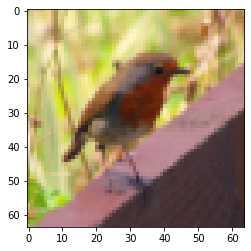

In [67]:
# Example of a picture
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0,index]) + ". It's a " + classes[train_set_y[0,index]].decode("utf-8") +  " picture.")

In [68]:
# Explore your dataset 
m_train = train_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
m_test = test_set_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_set_x_orig.shape))
print ("train_y shape: " + str(train_set_y.shape))
print ("test_x_orig shape: " + str(test_set_x_orig.shape))
print ("test_y shape: " + str(test_set_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


As usual, you reshape and standardize the images before feeding them to the network.

In [69]:
# Reshape the training and test examples 
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

print ("train_x's shape: " + str(train_set_x.shape))
print ("test_x's shape: " + str(test_set_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

## 10 - Architecture of your model
Now that you are familiar with the dataset, it is time to build a deep neural network to distinguish cat images from non-cat images.

You will build two different models:
- A 2-layer neural network
- An L-layer deep neural network

You will then compare the performance of these models, and also try out different values for $L$. 

### 10.1 - 2-layer neural network
<u>Detailed Architecture</u>:
- The input is a (64,64,3) image which is flattened to a vector of size $(12288,1)$
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ of size $(n^{[1]}, 12288)$
- You then add a bias term and take its ReLu to get the following vector: $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$
- You then repeat the same process
- You multiply the resulting vector by $W^{[2]}$ and add your intercept (bias)
- Finally, you take the sigmoid of the result. If it is greater than 0.5, you classify it to be a cat

### 10.2 - L-layer deep neural network
<u>Detailed Architecture</u>:
- The input is a (64,64,3) image which is flattened to a vector of size (12288,1)
- The corresponding vector: $[x_0,x_1,...,x_{12287}]^T$ is then multiplied by the weight matrix $W^{[1]}$ and then you add the intercept $b^{[1]}$. The result is called the linear unit
- Next, you take the ReLu of the linear unit. This process could be repeated several times for each $(W^{[l]}, b^{[l]})$ depending on the model architecture
- Finally, you take the sigmoid of the final linear unit. If it is greater than 0.5, you classify it to be a cat

### 10.3 - General methodology
As usual you will follow the neural network methodology to build the model:
    1. Initialize parameters / define hyperparameters
    2. Loop for num_iterations:
        a. Forward propagation
        b. Compute cost function
        c. Backward propagation
        d. Update parameters (using parameters, and grads from backpropagation) 
    4. Use trained parameters to predict labels

Now implement those two models!

## 11 - Two-layer neural network

**Exercise**:  Use the helper functions you have implemented in the previous assignment to build a 2-layer neural network with the following structure: *LINEAR -> RELU -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [70]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [97]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    # YOUR CODE HERE
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # YOUR CODE ENDS HERE
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # YOUR CODE HERE
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        

        cost = compute_cost(A2, Y)
        
        dAL = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        grads["dA2"], grads["dW2"], grads["db2"] = linear_activation_backward(dAL, cache2, "sigmoid")
        grads["dA1"], grads["dW1"], grads["db1"] = linear_activation_backward(grads["dA2"], cache1, "relu")

        parameters = update_parameters(parameters, grads, learning_rate)
        
        # YOUR CODE ENDS HERE

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Run the cell below to train your parameters. See if your model runs. The cost should be decreasing. It may take up to 5 minutes to run 2,500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354664
Cost after iteration 400: 0.5601966311605748
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.4339163151225749
Cost after iteration 800: 0.4007977536203887
Cost after iteration 900: 0.35807050113237976
Cost after iteration 1000: 0.3394281538366413
Cost after iteration 1100: 0.3052753636196265
Cost after iteration 1200: 0.27491377282130147
Cost after iteration 1300: 0.2468176821061484
Cost after iteration 1400: 0.19850735037466105
Cost after iteration 1500: 0.1744831811255665
Cost after iteration 1600: 0.17080762978097366
Cost after iteration 1700: 0.11306524562164699
Cost after iteration 1800: 0.09629426845937154
Cost after iteration 1900: 0.08342617959726872
Cost after iteration 2000: 0.07439078704319087
Cost after iteration 2100: 0.0663074813

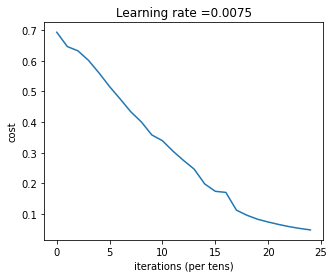

In [98]:
parameters = two_layer_model(train_set_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)


**Expected Output**:
<table> 
    <tr>
        <td>Cost after iteration 0</td>
        <td>0.6930497356599888</td>
    </tr>
    <tr>
        <td>Cost after iteration 100</td>
        <td>0.6464320953428849</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
    </tr>
    <tr>
        <td>Cost after iteration 2400</td>
        <td>0.048554785628770206</td>
    </tr>
</table>

Good thing you built a vectorized implementation! Otherwise it might have taken 10 times longer to train this.

Now, you can use the trained parameters to classify images from the dataset. To see your predictions on the training and test sets, run the cell below.

In [99]:
predictions_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.9999999999999998


**Expected Output**:
<table> 
    <tr>
        <td>Accuracy</td>
        <td>1.0</td>
    </tr>
</table>

In [100]:
predictions_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.72


**Expected Output**:

<table> 
    <tr>
        <td>Accuracy</td>
        <td>0.72</td>
    </tr>
</table>

**Note**: You may notice that running the model on fewer iterations (say 1,500) gives better accuracy on the test set. This is called "early stopping". Early stopping is a way to prevent overfitting. 

Congratulations! It seems that your 2-layer neural network has better performance (72%) than the logistic regression implementation (70%, assignment week 2). Let us see if you can do even better with an $L$-layer model.

## 12 - L-layer Neural Network

**Exercise**: Use the helper functions you have implemented previously to build an $L$-layer neural network with the following structure: *[LINEAR -> RELU]$\times$(L-1) -> LINEAR -> SIGMOID*. The functions you may need and their inputs are:
```python
def initialize_parameters_deep(layer_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [ ]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

In [101]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # YOUR CODE HERE
    parameters = initialize_parameters_deep(layers_dims)
    # YOUR CODE ENDS HERE

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # YOUR CODE HERE
        AL, cache = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, cache)
        parameters = update_parameters(parameters, grads, learning_rate)
        # YOUR CODE ENDS HERE
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

You will now train the model as a 5-layer neural network. 

Run the cell below to train your model. The cost should decrease on every iteration. It may take up to 5 minutes to run 2500 iterations. Check if the "Cost after iteration 0" matches the expected output below, if not click on the square (⬛) on the upper bar of the notebook to stop the cell and try to find your error.

Cost after iteration 0: 0.695046
Cost after iteration 100: 0.589260
Cost after iteration 200: 0.523261
Cost after iteration 300: 0.449769
Cost after iteration 400: 0.420900
Cost after iteration 500: 0.372464
Cost after iteration 600: 0.347421
Cost after iteration 700: 0.317192
Cost after iteration 800: 0.266438
Cost after iteration 900: 0.219914
Cost after iteration 1000: 0.143579
Cost after iteration 1100: 0.453092
Cost after iteration 1200: 0.094994
Cost after iteration 1300: 0.080141
Cost after iteration 1400: 0.069402
Cost after iteration 1500: 0.060217
Cost after iteration 1600: 0.053274
Cost after iteration 1700: 0.047629
Cost after iteration 1800: 0.042976
Cost after iteration 1900: 0.039036
Cost after iteration 2000: 0.035683
Cost after iteration 2100: 0.032915
Cost after iteration 2200: 0.030472
Cost after iteration 2300: 0.028388
Cost after iteration 2400: 0.026615


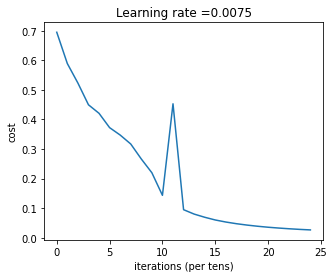

In [109]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations = 2500, print_cost = True)


**Expected Output**:
<table> 
    <tr>
        <td>Cost after iteration 0</td>
        <td>0.771749</td>
    </tr>
    <tr>
        <td>Cost after iteration 100</td>
        <td>0.672053</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
    </tr>
    <tr>
        <td>Cost after iteration 2400</td>
        <td>0.092878</td>
    </tr>
</table>

In [110]:
pred_train = predict(train_set_x, train_set_y, parameters)

Accuracy: 0.9999999999999998


<table>
    <tr>
    <td>Train Accuracy</td>
    <td>0.985645933014</td>
    </tr>
</table>

In [111]:
pred_test = predict(test_set_x, test_set_y, parameters)

Accuracy: 0.74


**Expected Output**:

<table> 
    <tr>
        <td>Test Accuracy</td>
        <td>0.8</td>
    </tr>
</table>

Congratulations! It seems that your 5-layer neural network has better performance (80%) than your 2-layer neural network (72%) on the same test set. 

This is good performance for this task. Nice job! 

##  13 - Results Analysis

First, take a look at some images the L-layer model labeled incorrectly. This will show a few mislabeled images. 

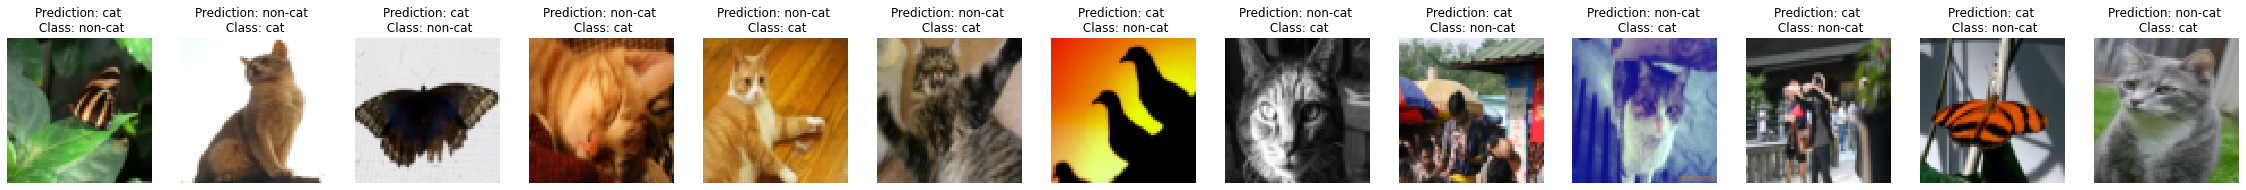

In [112]:
print_mislabeled_images(classes, test_set_x, test_set_y, pred_test)

**A few type of images the model tends to do poorly on include:** 
- Cat body in an unusual position
- Cat appears against a background of a similar color
- Unusual cat color and species
- Camera Angle
- Brightness of the picture
- Scale variation (cat is very large or small in image) 